In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [78]:
# Read in data

insurance_data = pd.read_csv('insurance.csv', delimiter = ',')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
# Define x,y variables. Reshape otherwise 1D array instead of 2D

x = insurance_data['age'].values.reshape(-1,1)

y = insurance_data['charges']

Text(0, 0.5, 'Charges')

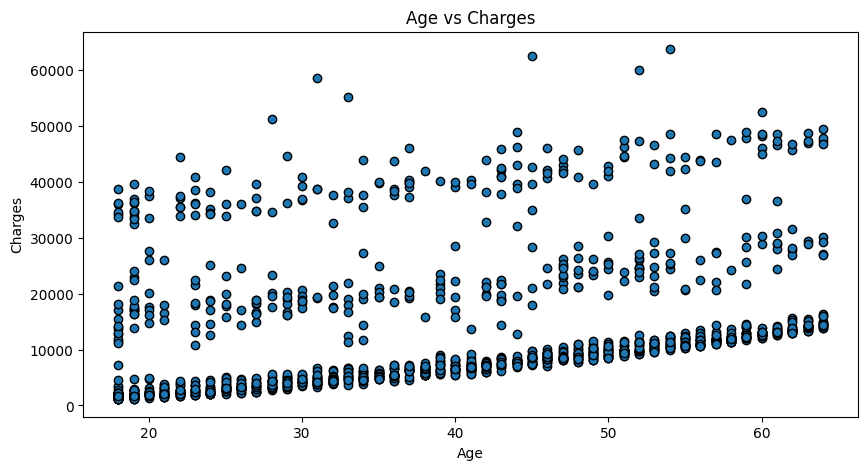

In [86]:
# Scatter plot age vs charges

plt.figure(figsize=(10, 5))
plt.scatter(x, y, edgecolors = 'k')
plt.title("Age vs Charges")
plt.xlabel('Age')
plt.ylabel('Charges')

In [81]:
# Fit model

insurance_model = LinearRegression()

insurance_model.fit(x,y)

LinearRegression()

Text(0, 0.5, 'Charges')

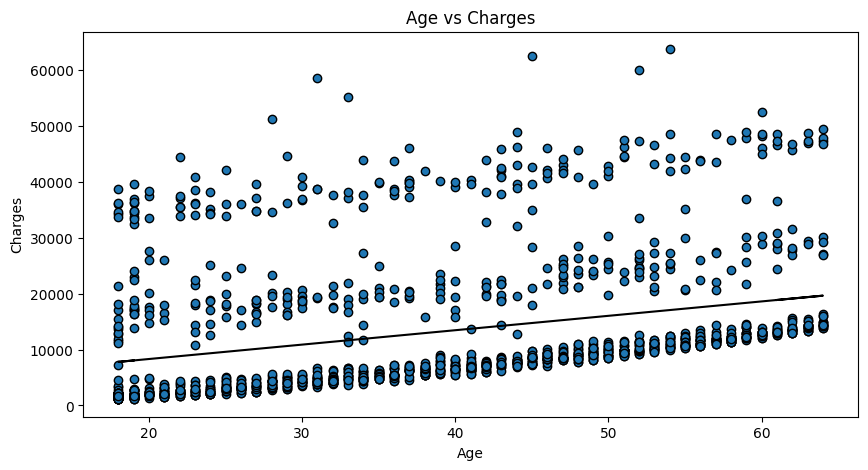

In [83]:
# Plot the line of best fit on data

y_pred = insurance_model.predict(x)


plt.figure(figsize=(10, 5))
plt.scatter(x, y, edgecolors = 'k')
plt.plot(x, y_pred, color = 'k')
plt.title("Age vs Charges")
plt.xlabel('Age')
plt.ylabel('Charges')
